In [1]:
import numpy as np
import pandas as pd

# importing dataset

In [2]:
df = pd.read_csv("Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Data Exploration

In [3]:
df.shape

(2200, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
corr = df.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<AxesSubplot:>

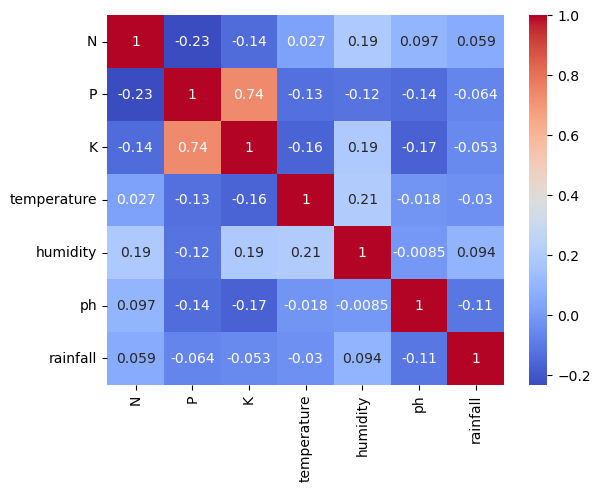

In [11]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

In [12]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

# Training and Testing

In [13]:
X = df[['N','P','K','temperature','humidity','ph','rainfall']]
y = df['label']
labels = df['label']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape

(1540, 7)

In [15]:
X_test.shape

(660, 7)

In [16]:
acc = []
model = []

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train,y_train)

predicted_values = DecisionTree.predict(X_test)
x = metrics.accuracy_score(y_test,predicted_values)
acc.append(x)
model.append('Decision Tree')
print("Decision tree's accuracy is: ",x*100)

Decision tree's accuracy is:  86.96969696969697


# Naive Bayesian

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train,y_train)

predicted_values = NaiveBayes.predict(X_test)
x = metrics.accuracy_score(y_test,predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive bayes's accuracy is: ",x*100)

Naive bayes's accuracy is:  99.39393939393939


Naive Bayes accuracy: 99.39393939393939


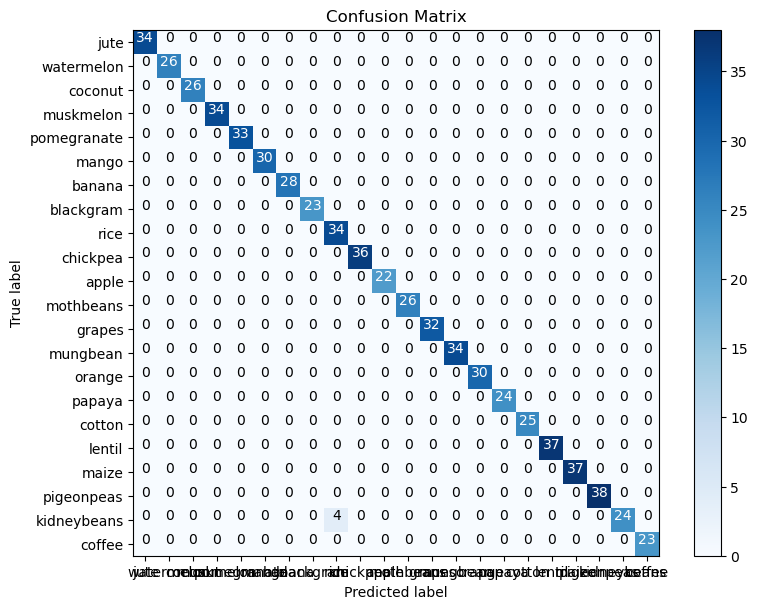

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train)

predicted_values = NaiveBayes.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, predicted_values)
print("Naive Bayes accuracy:", accuracy * 100)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_values)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
classes = set(y_test)
tick_marks = [i for i in range(len(classes))]
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add annotations
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [21]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)
SVM = SVC(kernel='poly',degree=3,C=1)
SVM.fit(X_train_norm,y_train)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(y_test,predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's accuracy is: ",x*100)

SVM's accuracy is:  96.81818181818181


# Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20,random_state=0)
RF.fit(X_train,y_train)

predicted_values = RF.predict(X_test)
x = metrics.accuracy_score(y_test,predicted_values)
acc.append(x)
model.append('RF')
print("Random Forest's accuracy is: ",x*100)

Random Forest's accuracy is:  99.24242424242425


# Accuracy Representation

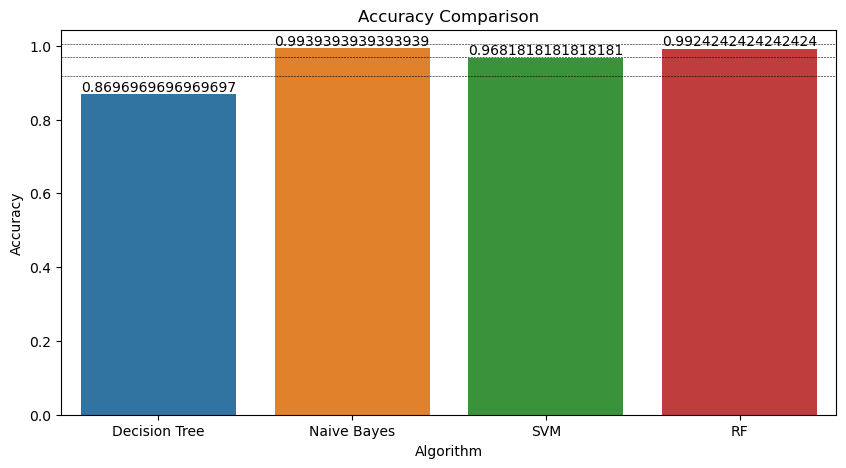

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,5],dpi=100)
plt.title('Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
sns.barplot(x = model,y = acc)
for i in range(len(model)):
    plt.text(i, acc[i], str(acc[i]), ha='center', va='bottom')
diff = np.diff(sorted(acc))
for i, d in enumerate(diff):
    plt.axhline(y=acc[i] + d/2, color='black', linestyle='--',linewidth='0.4')

# Prediction(naive bayesian)

In [24]:
data = np.array([[104,18,30,23.603016,60.3,6.7,104.91]])
prediction = NaiveBayes.predict(data)
print(prediction)

['coffee']


C:\Users\Aditi\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# Saving the model

In [ ]:
import pickle
NaiveBayes = GaussianNB()
NaiveBayes = NaiveBayes.fit(X_train,y_train)
with open('NaiveBayes_model.pkl', 'wb') as file:
    # Dump the trained model into the file
    pickle.dump(NaiveBayes, file)